https://www.theorie.physik.uni-muenchen.de/lsruhl/teaching_present/teaching-scrinzi/teaching-history/notes_public.pdf

In [2]:
# an elementary finite difference solver
import numpy as np # standard module for array handling
import scipy.linalg as la # standard module for linear algebra
# (1) choose number of grid points, volume...
ng=330 # number of grid points
L=10. # size of simulation box
# (2) select the system specifications
def potential(x): return x*x/2. # potential
# (3) set up derived quantities
h=L/float(ng) # grid spacing
qh=0.5/(h*h)
# (4) set up operators
kin=np.zeros((ng,ng)) # kinetic energy matrix
for i in range(ng):
    kin[i,i]=2.*qh
    if i>0:
        kin[i,i-1]=-qh
        kin[i-1,i]=-qh
    if i<ng-1:
        kin[i+1,i]=-qh
        kin[i,i+1]=-qh
pot=np.zeros((ng,ng)) # potential energy matrix
for i in range(ng): pot[i,i]=potential(-L/2+float(i)*h)
# (5) solve eigenproblem
(val,vec)=la.eig(kin+pot)
# (6) show results
print(np.sort(val.real)[:10])

[0.4999713  1.49985651 2.49962697 3.49928353 4.49883443 5.49833754
 6.49810356 7.49941733 8.50634976 9.52862631]


https://chem.libretexts.org/Ancillary_Materials/Interactive_Applications/Jupyter_Notebooks/Quantum_Harmonic_Oscillators_-_Plotting_Eigenstates_(Python_Notebook)

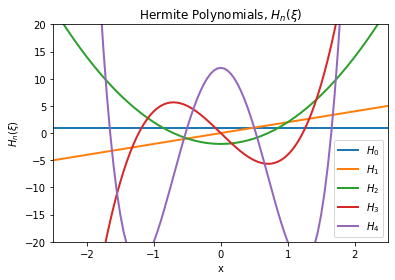

In [3]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy
import numpy.polynomial.hermite as Herm

#Choose simple units
m=1.
w=1.
hbar=1.

#Discretized space
dx = 0.05
x_lim = 12
x = numpy.arange(-x_lim,x_lim,dx)

def hermite(x, n):
    xi = numpy.sqrt(m*w/hbar)*x
    herm_coeffs = numpy.zeros(n+1)
    herm_coeffs[n] = 1
    return Herm.hermval(xi, herm_coeffs)
  
plt.figure()
plt.plot(x, hermite(x,0), linewidth=2,label=r"$H_0$")
plt.plot(x, hermite(x,1), linewidth=2,label=r"$H_1$")
plt.plot(x, hermite(x,2), linewidth=2,label=r"$H_2$")
plt.plot(x, hermite(x,3), linewidth=2,label=r"$H_3$")
plt.plot(x, hermite(x,4), linewidth=2,label=r"$H_4$")

#Set limits for axes
plt.xlim([-2.5,2.5])
plt.ylim([-20,20])

#Set axes labels
plt.xlabel("x")
plt.ylabel(r"$H_n(\xi)$")
plt.title(r"Hermite Polynomials, $H_n(\xi)$")
plt.legend()
plt.show()

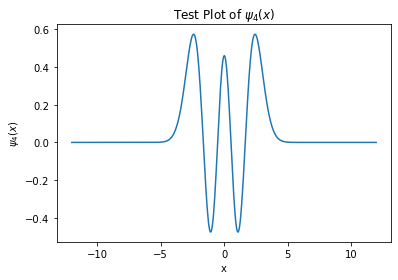

In [4]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy
import numpy.polynomial.hermite as Herm
import math

#Choose simple units
m=1.
w=1.
hbar=1.
#Discretized space
dx = 0.05
x_lim = 12
x = numpy.arange(-x_lim,x_lim,dx)

def hermite(x, n):
    xi = numpy.sqrt(m*w/hbar)*x
    herm_coeffs = numpy.zeros(n+1)
    herm_coeffs[n] = 1
    return Herm.hermval(xi, herm_coeffs)
  
def stationary_state(x,n):
    xi = numpy.sqrt(m*w/hbar)*x
    prefactor = 1./math.sqrt(2.**n * math.factorial(n)) * (m*w/(numpy.pi*hbar))**(0.25)
    psi = prefactor * numpy.exp(- xi**2 / 2) * hermite(x,n)
    return psi

plt.figure()
plt.plot(x, stationary_state(x,4))
plt.xlabel(r"x")
plt.ylabel(r"$\psi_4(x)$")
plt.title(r"Test Plot of $\psi_4(x)$")
plt.show()

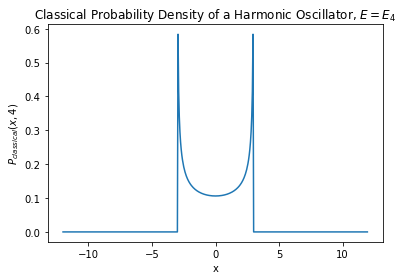

In [5]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy
import numpy.polynomial.hermite as Herm

#Choose simple units
m=1.
w=1.
hbar=1.
#Discretized space
dx = 0.05
x_lim = 12
x = numpy.arange(-x_lim,x_lim,dx)

def classical_P(x,n):
    E = hbar*w*(n+0.5)
    x_max = numpy.sqrt(2*E/(m*w**2))
    classical_prob = numpy.zeros(x.shape[0])
    x_inside = abs(x) < (x_max - 0.025)
    classical_prob[x_inside] = 1./numpy.pi/numpy.sqrt(x_max**2-x[x_inside]*x[x_inside])
    return classical_prob

plt.figure()
plt.plot(x, classical_P(x,4))
plt.xlabel(r"x")
plt.ylabel(r"$P_{classical}(x,4)$")
plt.title(r"Classical Probability Density of a Harmonic Oscillator, $E=E_4$")
plt.show()

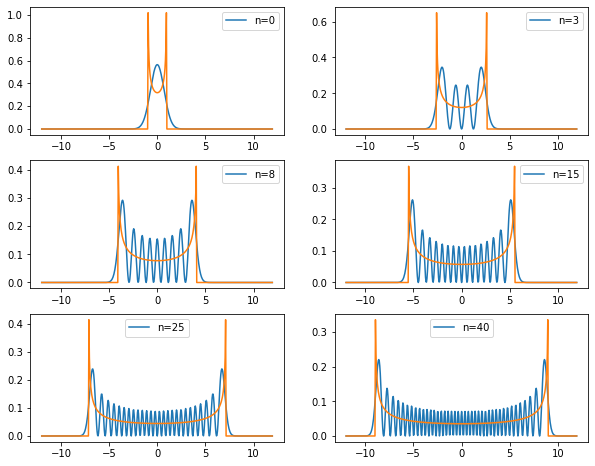

In [6]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy
import numpy.polynomial.hermite as Herm
import math

#Choose simple units
m=1.
w=1.
hbar=1.
#Discretized space
dx = 0.05
x_lim = 12
x = numpy.arange(-x_lim,x_lim,dx)

def hermite(x, n):
    xi = numpy.sqrt(m*w/hbar)*x
    herm_coeffs = numpy.zeros(n+1)
    herm_coeffs[n] = 1
    return Herm.hermval(xi, herm_coeffs)
def stationary_state(x,n):
    xi = numpy.sqrt(m*w/hbar)*x
    prefactor = 1./math.sqrt(2.**n * math.factorial(n)) * (m*w/(numpy.pi*hbar))**(0.25)
    psi = prefactor * numpy.exp(- xi**2 / 2) * hermite(x,n)
    return psi
  
def classical_P(x,n):
    E = hbar*w*(n+0.5)
    x_max = numpy.sqrt(2*E/(m*w**2))
    classical_prob = numpy.zeros(x.shape[0])
    x_inside = abs(x) < (x_max - 0.025)
    classical_prob[x_inside] = 1./numpy.pi/numpy.sqrt(x_max**2-x[x_inside]*x[x_inside])
    return classical_prob

plt.figure(figsize=(10, 8))
plt.subplot(3,2,1)
plt.plot(x, numpy.conjugate(stationary_state(x,0))*stationary_state(x,0), label="n=0")
plt.plot(x, classical_P(x,0))
plt.legend()
plt.subplot(3,2,2)
plt.plot(x, numpy.conjugate(stationary_state(x,3))*stationary_state(x,3), label="n=3")
plt.plot(x, classical_P(x,3))
plt.legend()
plt.subplot(3,2,3)
plt.plot(x, numpy.conjugate(stationary_state(x,8))*stationary_state(x,8), label="n=8")
plt.plot(x, classical_P(x,8))
plt.legend()
plt.subplot(3,2,4)
plt.plot(x, numpy.conjugate(stationary_state(x,15))*stationary_state(x,15), label="n=15")
plt.plot(x, classical_P(x,15))
plt.legend()
plt.subplot(3,2,5)
plt.plot(x, numpy.conjugate(stationary_state(x,25))*stationary_state(x,25), label="n=25")
plt.plot(x, classical_P(x,25))
plt.legend()
plt.subplot(3,2,6)
plt.plot(x, numpy.conjugate(stationary_state(x,40))*stationary_state(x,40), label="n=40")
plt.plot(x, classical_P(x,40))
plt.legend()
plt.show()